## Note:
<ul> 
<li>Need rating and movie name excel.</li>
<li>Merged rating and movie name excel based on common movie id column.</li>
<li>On merged dataset, the model trained on.</li>
</ul>

## Necessary Libraries and File Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

merged_db = pd.read_csv('D:/Job_assignment/DataSynthis_ML_JobTask/movieLens/merged_movies_ratings.csv')
merged_db.head()

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,4/2/2005 23:53,Jumanji (1995),Adventure|Children|Fantasy
1,1,29,3.5,4/2/2005 23:31,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
2,1,32,3.5,4/2/2005 23:33,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,3.5,4/2/2005 23:32,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,3.5,4/2/2005 23:29,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


## Checking the Condition of Merged Dataset

In [2]:
merged_db.shape

(1048575, 6)

In [3]:
merged_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1048575 non-null  int64  
 1   movieId    1048575 non-null  int64  
 2   rating     1048575 non-null  float64
 3   timestamp  1048575 non-null  object 
 4   title      1048575 non-null  object 
 5   genres     1048575 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 48.0+ MB


## Spliting the Dataset for Training and Testing

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(merged_db, test_size = 0.30, random_state = 42)

print(X_train.shape)
print(X_test.shape)

(734002, 6)
(314573, 6)


## Converting the Training Dataset into Wide-form Matrix

In [5]:
user_data = X_train.pivot(index = 'userId', columns = 'movieId', values = 'rating').fillna(0)
user_data.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,129233,129303,129350,129354,129428,129707,130073,130462,130490,130642
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Masking All Data
<ul> 
<li>This is used for implicit feedback models, where we care about whether a user interacted with an item.</li>
<li>sample_train = Observing ratings in the training set are replaced with ((0))</li>
<li>sample_test = Masking of actual ratings (1 where rating exists, 0 otherwise)</li>
</ul>


In [6]:
# make a copy of train and test datasets
sample_train = X_train.copy()
sample_test = X_test.copy()

sample_train['rating'] = sample_train['rating'].apply(lambda x: 0 if x > 0 else 1)
sample_test['rating'] = sample_test['rating'].apply(lambda x: 1 if x > 0 else 0)

In [7]:
# The movies not rated by user is marked as 1 for prediction 
sample_train = sample_train.pivot(index = 'userId', columns = 'movieId', values = 'rating').fillna(1)

# The movies not rated by user is marked as 0 for evaluation 
sample_test = sample_test.pivot(index ='userId', columns = 'movieId', values = 'rating').fillna(0)

In [8]:
# Checking the modified sample_train situation
sample_train.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,129233,129303,129350,129354,129428,129707,130073,130462,130490,130642
userId,,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [9]:
# Checking the modified sample_test situation
sample_test.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,128356,128510,128622,128648,128832,128842,129235,130052,130219,130490
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Calculation Cosine similarity Using Similarity Matrix

In [10]:
from sklearn.metrics.pairwise import cosine_similarity

# Using Cosine similarity as a similarity measure between Users
user_similarity = cosine_similarity(user_data)
user_similarity[np.isnan(user_similarity)] = 0
print(user_similarity)
print(user_similarity.shape)

[[1.         0.07266833 0.15193371 ... 0.04642812 0.03102107 0.0269577 ]
 [0.07266833 1.         0.12141126 ... 0.05894831 0.09820569 0.04523535]
 [0.15193371 0.12141126 1.         ... 0.13485622 0.14879402 0.        ]
 ...
 [0.04642812 0.05894831 0.13485622 ... 1.         0.04576821 0.        ]
 [0.03102107 0.09820569 0.14879402 ... 0.04576821 1.         0.15461395]
 [0.0269577  0.04523535 0.         ... 0.         0.15461395 1.        ]]
(7120, 7120)


## Visualiting the Data into Heatmap

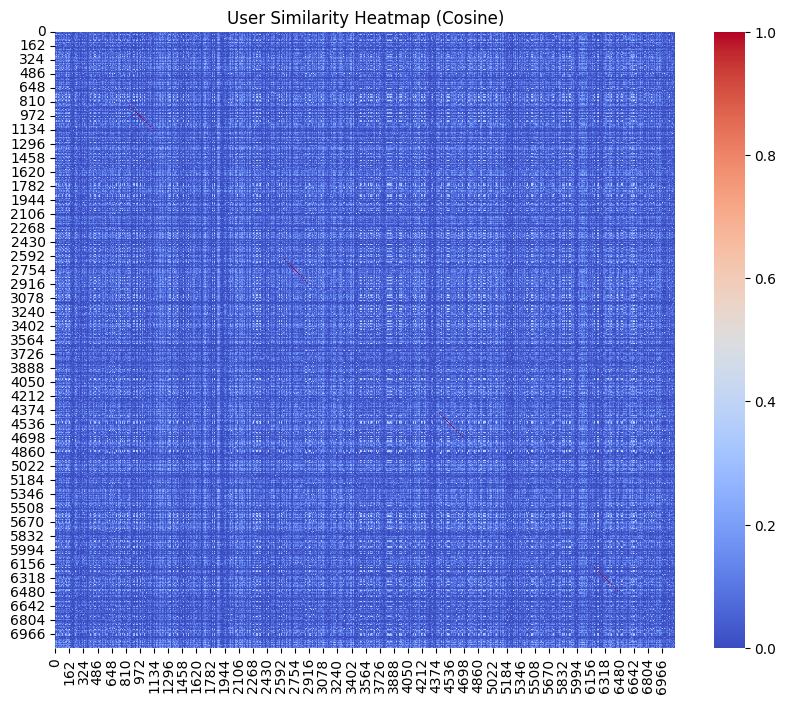

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(user_similarity, cmap="coolwarm", annot=False)
plt.title("User Similarity Heatmap (Cosine)")
plt.show()

In [12]:
# Predicting the user rating
user_predicted_ratings = np.dot(user_similarity, user_data)
user_predicted_ratings

array([[7.36402740e+02, 2.89406354e+02, 1.07533830e+02, ...,
        6.33921062e-01, 5.66801070e-02, 4.35646345e-01],
       [4.43765527e+02, 1.79166252e+02, 8.21492227e+01, ...,
        3.53418542e-01, 5.23490769e-02, 1.55933408e-01],
       [8.79139208e+02, 3.30478180e+02, 1.37889705e+02, ...,
        6.45798894e-01, 7.35304320e-02, 4.30887267e-01],
       ...,
       [4.35323296e+02, 1.44296003e+02, 6.47319778e+01, ...,
        3.63691372e-01, 2.96016828e-02, 2.72287110e-01],
       [1.07589724e+03, 4.82389300e+02, 1.93139069e+02, ...,
        5.70910438e-01, 9.81970570e-02, 2.62388774e-01],
       [3.13561531e+02, 1.64260570e+02, 8.36621178e+01, ...,
        7.45612665e-02, 0.00000000e+00, 7.48187742e-02]])

In [13]:
# Converting the user_predicted_ratings into dataFrame
user_predicted_ratings = pd.DataFrame(user_predicted_ratings, columns = user_data.columns)
user_predicted_ratings.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,129233,129303,129350,129354,129428,129707,130073,130462,130490,130642
0,736.402740,289.406354,107.533830,23.286274,92.846942,359.746706,117.144570,13.030505,27.452587,368.560461,...,0.310097,0.388515,0.592934,0.433988,0.732387,0.028333,0.387621,0.633921,0.056680,0.435646
1,443.765527,179.166252,82.149223,16.831979,74.755970,221.638923,93.620241,9.705620,22.536339,241.657469,...,0.144484,0.169312,0.236942,0.169981,0.454633,0.077416,0.180605,0.353419,0.052349,0.155933
2,879.139208,330.478180,137.889705,30.712409,125.813304,425.081851,160.537903,18.754883,39.836833,454.270040,...,0.323649,0.293596,0.438238,0.453415,0.772335,0.031064,0.404561,0.645799,0.073530,0.430887
3,533.529951,298.931768,135.240293,30.786943,143.458750,301.431695,153.443215,21.478334,42.166024,437.366573,...,0.136671,0.187830,0.092462,0.270808,0.256721,0.038915,0.170838,0.185928,0.055488,0.089439
4,948.273432,408.226259,205.720097,45.715760,206.190851,465.746859,248.669910,25.784969,61.930023,574.683159,...,0.170057,0.314112,0.459914,0.331312,0.703334,0.091237,0.212572,0.472469,0.099547,0.279064


In [14]:
# Checking the shape of the user_predicted_ratings 
user_predicted_ratings.shape

(7120, 13159)

In [15]:
# Filtering only the movies not rated by user for final recommendation
user_final_ratings = np.multiply(user_predicted_ratings, sample_train)
user_final_ratings = user_final_ratings.dropna()
user_final_ratings.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,129233,129303,129350,129354,129428,129707,130073,130462,130490,130642
1,443.765527,179.166252,82.149223,16.831979,74.755970,221.638923,93.620241,9.705620,22.536339,241.657469,...,0.144484,0.169312,0.236942,0.169981,0.454633,0.077416,0.180605,0.353419,0.052349,0.155933
2,879.139208,330.478180,137.889705,30.712409,125.813304,425.081851,160.537903,18.754883,39.836833,454.270040,...,0.323649,0.293596,0.438238,0.453415,0.772335,0.031064,0.404561,0.645799,0.073530,0.430887
3,0.000000,298.931768,135.240293,30.786943,143.458750,301.431695,153.443215,21.478334,42.166024,437.366573,...,0.136671,0.187830,0.092462,0.270808,0.256721,0.038915,0.170838,0.185928,0.055488,0.089439
4,948.273432,408.226259,205.720097,45.715760,206.190851,465.746859,248.669910,25.784969,61.930023,574.683159,...,0.170057,0.314112,0.459914,0.331312,0.703334,0.091237,0.212572,0.472469,0.099547,0.279064
5,749.121014,176.129725,218.379051,25.268923,218.618567,313.202626,289.034237,13.681200,76.233725,228.136650,...,0.087717,0.153551,0.125269,0.102413,0.361015,0.000000,0.109646,0.106037,0.043280,0.109218


In [16]:
# Displaying the top 5 movie recommendations for userId = 42
user_final_ratings.iloc[42].sort_values(ascending = False)[0:5]

movieId
296    923.268911
260    869.851023
858    746.691532
593    736.631378
356    712.165466
Name: 43, dtype: float64

In [17]:
# Using Cosine similarity as a similarity measure between Movies
movie_features = X_train.pivot(index = 'movieId', columns = 'userId', values = 'rating').fillna(0)
movie_features.head()

userId,1,2,3,4,5,6,7,8,9,10,...,7111,7112,7113,7114,7115,7116,7117,7118,7119,7120
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,5.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0


In [18]:
from sklearn.metrics.pairwise import cosine_similarity

# Item Similarity Matrix using Cosine similarity as a similarity measure between Items
item_similarity = cosine_similarity(movie_features)
item_similarity[np.isnan(item_similarity)] = 0
print(item_similarity)
print("- "*10)
print(item_similarity.shape)

[[1.         0.29033319 0.21722605 ... 0.02617928 0.02908809 0.02327047]
 [0.29033319 1.         0.15540424 ... 0.         0.         0.        ]
 [0.21722605 0.15540424 1.         ... 0.         0.         0.        ]
 ...
 [0.02617928 0.         0.         ... 1.         0.         0.        ]
 [0.02908809 0.         0.         ... 0.         1.         0.        ]
 [0.02327047 0.         0.         ... 0.         0.         1.        ]]
- - - - - - - - - - 
(13159, 13159)


In [19]:
# Predicting the item rating
item_predicted_ratings = np.dot(movie_features.T, item_similarity)
item_predicted_ratings

array([[ 89.87454003,  72.82873255,  36.44537363, ...,   3.20991701,
          1.21992689,   9.11640219],
       [ 32.09274191,  25.78105365,  15.91357045, ...,   0.98968286,
          0.50721018,   2.2258704 ],
       [110.12609131,  85.52416047,  47.01161332, ...,   3.26813234,
          1.59376024,   8.50054445],
       ...,
       [ 25.44699127,  17.11878556,  10.51404514, ...,   0.98033485,
          0.44130834,   2.04643833],
       [ 43.04291543,  38.25287948,  21.85073992, ...,   1.29841502,
          0.85991929,   1.69933515],
       [ 10.5633143 ,  10.87470813,   7.08628234, ...,   0.11485236,
          0.        ,   0.33004245]])

In [20]:
# Converting the item_predicted_ratings into dataFrame
item_predicted_ratings = pd.DataFrame(item_predicted_ratings, columns = movie_features.index)
item_predicted_ratings.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,129233,129303,129350,129354,129428,129707,130073,130462,130490,130642
0,89.874540,72.828733,36.445374,22.091735,32.089305,67.562106,38.535657,16.455388,17.562778,67.202059,...,9.335932,8.221801,3.569877,6.612942,7.927121,0.224742,9.335932,3.209917,1.219927,9.116402
1,32.092742,25.781054,15.913570,9.570052,13.628742,25.303947,16.302535,6.713347,8.159252,25.319030,...,2.481136,2.022191,0.846736,1.197630,2.306893,0.379184,2.481136,0.989683,0.507210,2.225870
2,110.126091,85.524160,47.011613,30.764342,41.636491,85.742051,52.882450,24.836375,26.403201,84.769610,...,9.581089,6.524248,2.829003,5.829682,8.593033,0.235509,9.581089,3.268132,1.593760,8.500544
3,17.093182,17.660436,11.103571,6.449762,11.532598,14.693325,11.689052,6.102679,6.433255,18.219406,...,0.797744,1.077051,0.187350,0.956608,0.790820,0.191476,0.797744,0.250178,0.298527,0.497863
4,52.712984,45.314673,29.206202,17.855734,29.273772,40.970622,33.871629,13.924810,15.689046,45.250512,...,1.957508,3.256705,1.620728,2.089573,3.732073,0.463333,1.957508,1.278119,1.287390,2.239168


In [21]:
# Checking the shape of the item_predicted_ratings
item_predicted_ratings.shape

(7120, 13159)

In [22]:
# Filtering only the movies not rated by user for final recommendation
sample_train.shape

(7120, 13159)

## CF-based Recommendation System

#### Model Training Session
<ul>
<li>Final droping unnecessaries</li>
<li>Training the CF model with necessary components</li>
<li>Saving the model and componenets into local directory</li>
<li>Printing the path of the model where saved</li>
</ul>

In [23]:

item_final_ratings = np.multiply(item_predicted_ratings, sample_train)
item_final_ratings = user_final_ratings.dropna()
item_final_ratings.head()

# Save all necessary components for CF model
import pickle
import os

# Create a dictionary with all necessary components for CF model
cf_model_components = {
    'item_similarity': item_similarity,
    'movie_features': movie_features,
    'merged_db': merged_db,
    'item_final_ratings': item_final_ratings
}

# Save the model components
model_path = 'D:/Job_assignment/DataSynthis_ML_JobTask/cf_model.pkl'
with open(model_path, 'wb') as f:
    pickle.dump(cf_model_components, f)

print(f"\nCF model components saved to: {os.path.abspath(model_path)}")


CF model components saved to: D:\Job_assignment\DataSynthis_ML_JobTask\cf_model.pkl


## Checking the Model Performance

In [24]:
# Displaying sorted top 5 movie recommendations for userId = 20
item_final_ratings.iloc[20].sort_values(ascending = False)[0:5]

movieId
356     1021.103805
480      908.898348
110      885.440661
2571     855.312275
457      843.290703
Name: 21, dtype: float64

In [25]:
# Displaying sorted top 5 movie recommendations for userId = 50
item_final_ratings.iloc[50].sort_values(ascending = False)[0:5]

movieId
296    1294.682510
110    1106.099707
356    1067.062151
318    1043.505285
480     954.975724
Name: 51, dtype: float64

## Implementing CF based Movie Recommendation Function
#### This function will take user ID as input, Return top 5 movies in sorted list

In [26]:
def recommend_movies(user_id, N=5):
    """
    Recommends top N movies for a given user
    
    Parameters:
    user_id (int): The ID of the user to recommend movies for
    N (int): Number of movies to recommend (default is 5)
    
    Returns:
    list: A list of tuples containing (movie_id, predicted_rating)
    """
    try:
        # Get the predictions for this user
        user_predictions = item_final_ratings.loc[user_id]
        
        # Sort predictions in descending order and get top N
        top_n_recommendations = user_predictions.sort_values(ascending=False)[:N]
        
        # Convert to list of tuples (movie_id, predicted_rating)
        recommendations = [(int(movie_id), float(rating)) 
                         for movie_id, rating in top_n_recommendations.items()]
        
        return recommendations
    
    except KeyError:
        return f"User ID {user_id} not found in the dataset"
    except Exception as e:
        return f"An error occurred: {str(e)}"

#### Testing the CF based Movie Recommendation Function

In [29]:
# Test the recommendation function
test_user_id = 120  # You can change this to any user ID in your dataset
recommendations = recommend_movies(test_user_id, N=5)
print(f"Top 5 movie recommendations for user {test_user_id}:")
for movie_id, pred_rating in recommendations:
    # Get movie title from merged_db
    movie_title = merged_db[merged_db['movieId'] == movie_id]['title'].iloc[0]
    print(f"Movie: {movie_title} (ID: {movie_id}), Predicted Rating: {pred_rating:.2f}")

Top 5 movie recommendations for user 120:
Movie: Pulp Fiction (1994) (ID: 296), Predicted Rating: 804.64
Movie: Star Wars: Episode IV - A New Hope (1977) (ID: 260), Predicted Rating: 778.57
Movie: Star Wars: Episode V - The Empire Strikes Back (1980) (ID: 1196), Predicted Rating: 688.84
Movie: Matrix, The (1999) (ID: 2571), Predicted Rating: 667.48
Movie: Star Wars: Episode VI - Return of the Jedi (1983) (ID: 1210), Predicted Rating: 664.87


## SVD-based Recommendation System
#### Implementing the system using Singular Value Decomposition recommendation with the surprise library.

In [30]:

# Import required libraries for SVD
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split as surprise_train_test_split
from surprise import accuracy
import pandas as pd

In [31]:
# Prepare the data for SVD
# Define the rating scale
reader = Reader(rating_scale=(1, 5))

# Create the dataset for surprise
ratings_data = merged_db[['userId', 'movieId', 'rating']]
surprise_data = Dataset.load_from_df(ratings_data, reader)

# Split the data into training and testing sets
trainset, testset = surprise_train_test_split(surprise_data, test_size=0.25, random_state=42)

#### SVD Model Training Session

In [44]:
# Initialize and train the SVD model
svd_model = SVD(n_factors=100, n_epochs=20, lr_all=0.005, reg_all=0.02)
svd_model.fit(trainset)

# Make predictions on the test set
predictions = svd_model.test(testset)

#### SVD Model Evalution

In [45]:
# Evaluate the model
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

RMSE: 0.8375
MAE:  0.6410
RMSE: 0.8375147126746615
MAE: 0.6410249087871853


## Implementing SVD based Movie Recommendation Function
#### This function will take user ID as input, Return top 5 movies in sorted list

In [33]:
def recommend_movies_svd(user_id, N=5):
    """
    Recommends top N movies for a given user using SVD
    
    Parameters:
    user_id (int): The ID of the user to recommend movies for
    N (int): Number of movies to recommend (default is 5)
    
    Returns:
    list: A list of tuples containing (movie_id, predicted_rating, movie_title)
    """
    try:
        # Get all movies
        all_movies = merged_db['movieId'].unique()
        
        # Get movies the user hasn't rated
        user_movies = merged_db[merged_db['userId'] == user_id]['movieId']
        movies_to_predict = np.setdiff1d(all_movies, user_movies)
        
        # Make predictions
        predictions = []
        for movie_id in movies_to_predict:
            predicted_rating = svd_model.predict(user_id, movie_id).est
            movie_title = merged_db[merged_db['movieId'] == movie_id]['title'].iloc[0]
            predictions.append((movie_id, predicted_rating, movie_title))
        
        # Sort by predicted rating and get top N
        recommendations = sorted(predictions, key=lambda x: x[1], reverse=True)[:N]
        
        return recommendations
    
    except Exception as e:
        return f"An error occurred: {str(e)}"

#### Testing the SVD-based Movie Recommendation Function

In [36]:

test_user_id = 36  # user_id
svd_recommendations = recommend_movies_svd(test_user_id, N=5)
print(f"\nTop 5 movie recommendations for user {test_user_id} using SVD:")
for movie_id, pred_rating, movie_title in svd_recommendations:
    print(f"Movie: {movie_title} (ID: {movie_id}), Predicted Rating: {pred_rating:.2f}")


Top 5 movie recommendations for user 36 using SVD:
Movie: Matewan (1987) (ID: 3090), Predicted Rating: 4.36
Movie: Lady Eve, The (1941) (ID: 2935), Predicted Rating: 4.32
Movie: Shawshank Redemption, The (1994) (ID: 318), Predicted Rating: 4.30
Movie: Devil and Daniel Johnston, The (2005) (ID: 44633), Predicted Rating: 4.24
Movie: Decalogue, The (Dekalog) (1989) (ID: 26587), Predicted Rating: 4.22


# Evaluation Metrics for Recommendation Systems
Evaluating CF model using:
<ul>
<li>Precision@k</li>
<li>Recall@k</li>
<li>NDCG (Normalized Discounted Cumulative Gain)</li>
</ul>

#### Funtional workflow of Each Evaluation MAtrix
<ul>
<li>precision_at_k = Measures the proportion of recommended items in the top-k list that are actually relevant.</li>
<li>recall_at_k = Measures the proportion of relevant items that appear in the top-k recommended list.</li>
<li>ndcg_at_k = Evaluates ranking quality by rewarding relevant items placed higher in the top-k list.</li>
</ul>


In [37]:
def precision_at_k(actual, predicted, k):
    """
    Calculate precision@k
    actual: list of actual items
    predicted: list of predicted items
    k: number of items to consider
    """
    if len(predicted) > k:
        predicted = predicted[:k]
    
    num_hits = len(set(actual) & set(predicted))
    return num_hits / k if k != 0 else 0

def recall_at_k(actual, predicted, k):
    """
    Calculate recall@k
    actual: list of actual items
    predicted: list of predicted items
    k: number of items to consider
    """
    if len(predicted) > k:
        predicted = predicted[:k]
    
    num_hits = len(set(actual) & set(predicted))
    return num_hits / len(actual) if len(actual) != 0 else 0

def ndcg_at_k(actual, predicted_ratings, k):
    """
    Calculate NDCG@k
    actual: list of actual items
    predicted_ratings: list of (item, rating) tuples
    k: number of items to consider
    """
    if len(predicted_ratings) > k:
        predicted_ratings = predicted_ratings[:k]
    
    dcg = 0
    idcg = 0
    
    # Calculate DCG
    for i, (item, rating) in enumerate(predicted_ratings):
        if item in actual:
            dcg += 1 / np.log2(i + 2)  # i + 2 because i starts at 0
            
    # Calculate IDCG
    for i in range(min(len(actual), k)):
        idcg += 1 / np.log2(i + 2)
        
    return dcg / idcg if idcg != 0 else 0

In [46]:
# Evaluate cf model on test set
def evaluate_recommendations(test_users, k_values=[5, 10]):
    results = {
        'CF': {'precision': {}, 'recall': {}, 'ndcg': {}},
    }
    
    for user_id in test_users:
        # Get actual movies rated by user in test set
        actual_movies = set(X_test[X_test['userId'] == user_id]['movieId'])
        
        if len(actual_movies) == 0:
            continue
            
        # Get CF recommendations
        cf_recs = recommend_movies(user_id, max(k_values))
        cf_movies = [movie_id for movie_id, _ in cf_recs]
        
        for k in k_values:
            # CF Metrics
            results['CF']['precision'][k] = results['CF']['precision'].get(k, [])
            results['CF']['precision'][k].append(precision_at_k(actual_movies, cf_movies, k))
            
            results['CF']['recall'][k] = results['CF']['recall'].get(k, [])
            results['CF']['recall'][k].append(recall_at_k(actual_movies, cf_movies, k))
            
            results['CF']['ndcg'][k] = results['CF']['ndcg'].get(k, [])
            results['CF']['ndcg'][k].append(ndcg_at_k(actual_movies, cf_recs, k))
            

    
    # Calculate averages
    for model in results:
        for metric in results[model]:
            for k in results[model][metric]:
                results[model][metric][k] = np.mean(results[model][metric][k])
    
    return results

In [47]:
# Run evaluation on a sample of test users
test_users = X_test['userId'].unique()[:100]  # Using first 100 users for faster evaluation
k_values = [5, 10]
evaluation_results = evaluate_recommendations(test_users, k_values)


for k in k_values:
    print(f"\nMetrics at K={k}:")
    print("-" * 25)
    print(f"{'Metric':<15} {'CF':<10}")
    print("-" * 25)
    
    metrics = ['precision', 'recall', 'ndcg']
    for metric in metrics:
        cf_value = evaluation_results['CF'][metric][k]
        print(f"{metric:<15} {cf_value:.4f}")


Metrics at K=5:
-------------------------
Metric          CF        
-------------------------
precision       0.4760
recall          0.0276
ndcg            0.4914

Metrics at K=10:
-------------------------
Metric          CF        
-------------------------
precision       0.4140
recall          0.0462
ndcg            0.4427


#### Visualize CF model performance for different k-values

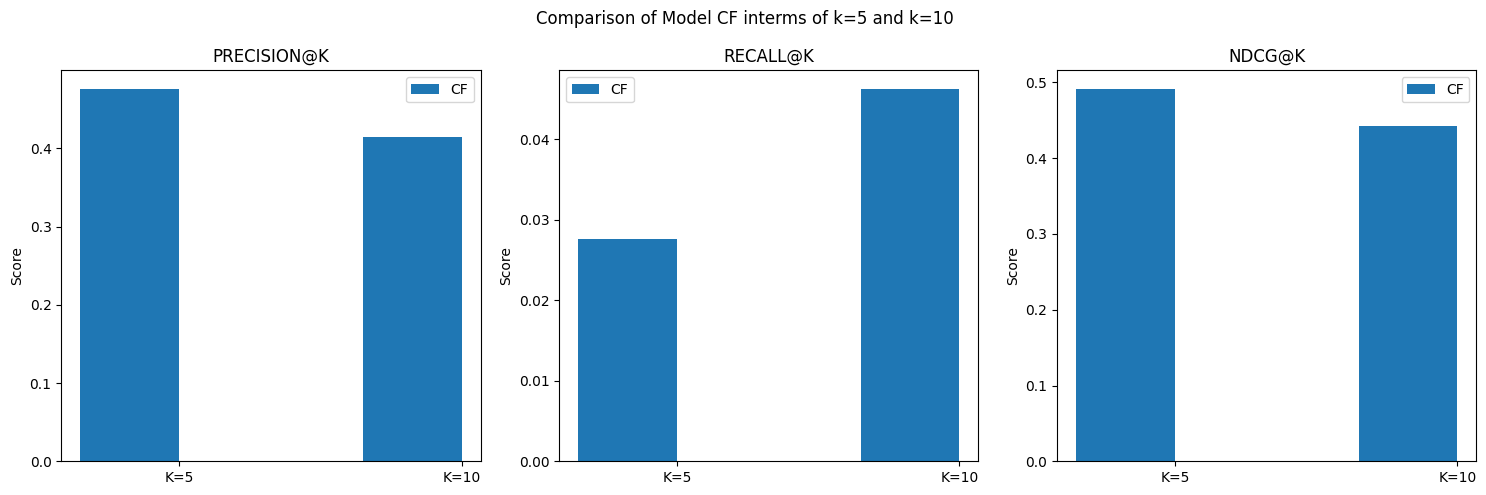

In [43]:
# Visualize the results
import matplotlib.pyplot as plt

metrics = ['precision', 'recall', 'ndcg']
k_values = [5, 10] # Top-K values used for evaluation

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Comparison of Model CF interms of k=5 and k=10')

# Loop through each metric and plot corresponding bars
for i, metric in enumerate(metrics):
    cf_values = [evaluation_results['CF'][metric][k] for k in k_values]
 
    x = np.arange(len(k_values))
    width = 0.35

    # Configure subplot labels and appearance
    axes[i].bar(x - width/2, cf_values, width, label='CF')
    axes[i].set_title(f'{metric.upper()}@K')
    axes[i].set_xticks(x)
    axes[i].set_xticklabels([f'K={k}' for k in k_values])
    axes[i].legend()
    axes[i].set_ylabel('Score')

plt.tight_layout()
plt.show()